In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# import sklearn
%matplotlib inline
import seaborn as sns
import scipy
import math
import cvxopt

In [2]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [19]:
%%time
data = pd.read_csv('/Users/tony/Desktop/texts-classification-ml-hse-2019/train.csv')
print(data.shape)

(4234042, 4)
CPU times: user 1min, sys: 44.6 s, total: 1min 44s
Wall time: 4min 49s


In [96]:
data.head()

title  \
0  Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год   
1                   Утюг утп 1000 ватт СССР 1987 год   
2                            Возвму машину с выкупом   
3                                        Полусапожки   
4                                  Босоножки кожаные   

                                         description  \
0  Комплект ЭБУ (мозги, компьютер мотора, двигате...   
1  Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...   
2  Возьму машину в аренду с последующим выкупом н...   
3  полусапожки в отличном состоянии, один раз оде...   
4  Кожаные(натур) босоножки Karlo Pasolini, 40 рр...   

               Category_name  Category  
0      Запчасти и аксессуары        10  
1            Бытовая техника        21  
2          Предложение услуг       114  
3  Одежда, обувь, аксессуары        27  
4  Одежда, обувь, аксессуары        27

In [37]:
from pymorphy2 import MorphAnalyzer

In [38]:
morph = MorphAnalyzer()

In [56]:
morph.normal_forms("двигателя")

['двигатель']

In [87]:
re.findall(pattern=r'\w+', string='1234')

['1234']

In [99]:
text = "Красивая мама красиво мыла раму"
text

'Красивая мама красиво мыла раму'

In [100]:
from pymystem3 import Mystem

In [101]:
m = Mystem()

Installing mystem to /Users/tony/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-macosx.tar.gz


In [109]:
''.join(m.lemmatize(data.description.sample().values[0])).strip()

'продавать двухкомнатный квартира в хороший состояние. устанавливать счетчик холодный и горячий вода, заменять трубопровод холодный, горячий вода, заменять канализационный  труба, во весь квартира устанавливать алюминиевый радиатор отопление с отсечный и регуляровочный кран, в квартира очень тепло, устанавливать два пластиковый окно./\n  по счастливый случайность дом попадать под следующий программа: /\n - по замена весь труба отопление (включая змеевик в ванный комната;/\n - по замена весь крыша (на дом сделать двухскатный крыша);/\n - и один из немаловажный на сегодняшний день программа по расширение парковочный место во двор./\nпри весь этот проводить работа в дом, жировка составлять лето 1500р (+-200р.), зима 2900 (+-200р.). в квартира чисто и аккуратно при желание можно заезжать и жить ни что не делать./\nдом очень удачно располагать, развитый ифраструктура:/\n - четыре детский сад (№ 50, 54, 55, 60);/\n - три школа (№ 83, 88, 77);/\n - супермаркет (мария-ра, ярко, абрикос, мармел

In [1]:
import os
import pandas as pd
import numpy as np
import pymorphy2
from tqdm.notebook import tqdm
import re
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

data = pd.read_csv('/Users/tony/Desktop/texts-classification-ml-hse-2019/train.csv')
print("data.shape:", data.shape)

# normalized_descriptions = []

# with open('/Users/tony/Desktop/texts-classification-ml-hse-2019/parsed_texts.txt', mode='a', encoding='utf-8') as f:
#     for description in tqdm(data.description.values):
#         sentence = re.findall(pattern=r'\w+', string=description)
#         sentence_normed = ''
#         for word in sentence:
#             if set('0123456789') & set(word):
#                 continue
#             sentence_normed += morph.normal_forms(word)[0] + ' '
#         f.writelines(sentence_normed.strip() + '\n')


In [130]:
m = Mystem()

In [2]:
normalized_descriptions = []

for description in tqdm(data.description.values):
    sentence = ' '.join(re.findall(pattern=r'\w+', string=description))
    for symb in range(10):
        sentence = sentence.replace(f'{symb}', '')
    sentence_normed = ''.join(m.lemmatize(sentence, ))
    normalized_descriptions.append(sentence_normed.strip())

In [3]:
parsed_texts = []
with open('/Users/tony/Desktop/texts-classification-ml-hse-2019/parsed_texts.txt', mode='r', encoding='utf-8') as f:
    for row in tqdm(f):
        parsed_texts.append(row.strip())

In [7]:
k = 2
parsed_texts[k]

'взять машина в аренда с последующий выкуп недорогой у кто есть возможность задать машина писать сюда звонок мочь не услышать'

In [8]:
from gensim.models import Word2Vec, FastText

In [9]:
%%time
fasttext_model = FastText(sentences=[sentence.split() for sentence in parsed_texts[:55000]])

CPU times: user 4min 31s, sys: 7.44 s, total: 4min 38s
Wall time: 4min 4s


In [17]:
fasttext_model.most_similar(positive=['папа', 'плита'], negative=['мама'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('литкор', 0.7949293851852417),
 ('пан', 0.7516562938690186),
 ('панелевоз', 0.7433696389198303),
 ('плитняк', 0.7379932999610901),
 ('газоблок', 0.7284838557243347),
 ('балл', 0.719489574432373),
 ('панель', 0.7183331251144409),
 ('плинтус', 0.717732310295105),
 ('гидрозатвор', 0.717479407787323),
 ('элита', 0.7077865600585938)]

In [20]:
X = data.loc[:len(parsed_texts), ['Category_name']].copy()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
%%time
tf_idf = TfidfVectorizer()
tf_idf.fit(parsed_texts)

CPU times: user 3.86 s, sys: 442 ms, total: 4.3 s
Wall time: 6.47 s


TfidfVectorizer()

In [24]:
tf_idf.get_feature_names()

['__',
 '___',
 '____',
 '_____',
 '______',
 '_______',
 '________',
 '_________',
 '__________',
 '___________',
 '_____________',
 '______________',
 '_______________',
 '________________',
 '__________________',
 '___________________',
 '____________________',
 '_____________________',
 '______________________',
 '_______________________',
 '________________________',
 '_________________________',
 '__________________________',
 '___________________________',
 '____________________________',
 '_____________________________',
 '______________________________',
 '_______________________________',
 '________________________________',
 '_________________________________',
 '__________________________________',
 '___________________________________',
 '____________________________________',
 '_____________________________________',
 '______________________________________',
 '_______________________________________',
 '________________________________________',
 '_______________________

In [25]:
word2idf_dict = dict(zip(
    tf_idf.get_feature_names(), tf_idf.idf_
))

In [27]:
vecs = []
for description in tqdm(data.title.values):
    sentence_list = description.strip().split()
    vec = np.zeros(fasttext_model.vector_size)
    denominator = 0
    if len(sentence_list) > 1:
        for word in sentence_list:
            if word in fasttext_model:
                curr_idf = word2idf_dict.get(word, np.mean(tf_idf.idf_))
                vec += fasttext_model[word] * curr_idf
                denominator += curr_idf
        vec = vec / (denominator + 1e-120)
    vecs.append(vec)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method w

KeyboardInterrupt: 

In [29]:
np.array(vecs)

(4395, 100)

In [31]:
X = pd.concat([data.loc[:len(vecs)-1, ['Category_name']], 
               pd.DataFrame(np.array(vecs), columns=[f'x{i}' for i in range(1, fasttext_model.vector_size+1)])], 
              axis=1)


In [33]:
from sklearn.manifold import TSNE

In [34]:
%%time
# X_ts = TSNE(n_components=2, metric='cosine').fit_transform(X[[f'x{i}' for i in range(1, 101)]])
X_ts = TSNE(n_components=2).fit_transform(np.array(vecs[:3000]))

CPU times: user 1min 31s, sys: 5.83 s, total: 1min 37s
Wall time: 1min 6s


In [270]:
# colors = np.array(list(matplotlib.colors.cnames.keys()))
# colors

In [265]:
categories_dict = dict(zip(X['Category_name'].unique(), range(len(X['Category_name'].unique()))))

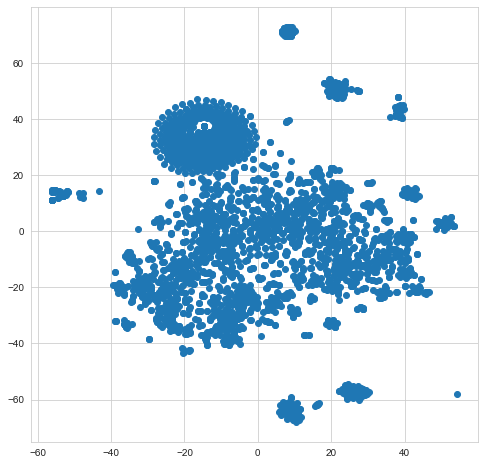

In [36]:
plt.scatter(
    X_ts[:, 0], X_ts[:, 1],
#     color=colors[X['Category_name'].map(categories_dict)]
)

In [42]:
idxs = np.where((37 <= X_ts[:, 0]) & (X_ts[:, 0] <= 50) & (10 <= X_ts[:, 1]) & (X_ts[:, 1] <= 20))[0]
idxs

array([  25,   82,  200,  271,  409,  436,  463,  633,  680,  898,  929,
       1002, 1054, 1311, 1425, 1623, 1627, 1650, 1666, 1700, 1708, 1730,
       2078, 2258, 2261, 2286, 2298, 2320, 2331, 2425, 2878])

In [43]:
data.title.values[idxs]

array(['Продаю вечернее платье макси', 'Продаётся платье',
       'Продам. Отличную резину', 'Продам тумпочки',
       'Продам конверт на выписку', 'Продам чехол на SAMSUNG S8+',
       'Подставку для кормления крупной собаки продам', 'Продам дубленку',
       'Продам колонки pioneer', 'Продам полуприцеп шмитц',
       'Продаю угловой шкаф купе', 'Продам автошины',
       'Продаётся корсет ортопедически', 'Продам снуд', 'Продаётся рнм-1',
       'Продам спальный гарнитур', 'Продам дублёнку',
       'Продам колеса 265*16', 'Продам бутсы адидас',
       'Продам курточку весна', 'Продаётся шуба', 'Продам колеса',
       'Продаю мужскую куртку', 'Продам картофель', 'Продам Galaxy J3',
       'Продам куому 26 размер', 'Продам ботинки', 'Продаю Шины',
       'Продам новое темно-синее платье', 'Продам телевизор',
       'Продаю рубашку'], dtype=object)